# Building a Custom Visualization

In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset.

<br>
<img src="assets/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). 

One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="assets/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

This solution represent solution for this task:

1) Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

2) Add interactivity, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

In [1]:
# Initial data for this task:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider



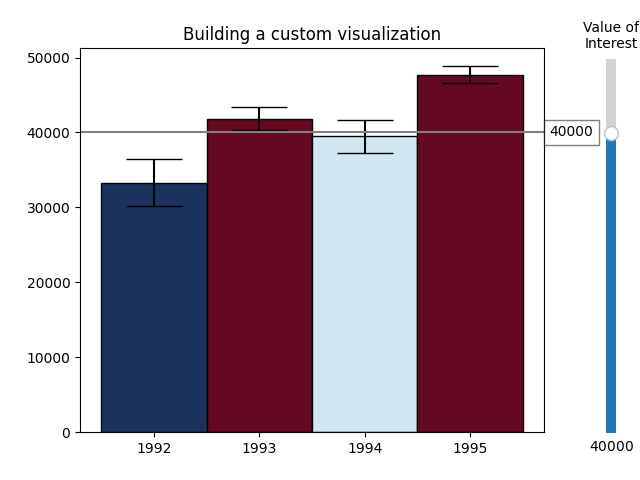

In [4]:
# widget update function
def update(val):
    # update line position
    added_line.update({'data': ([0, 1], [val, val])})
    # update line text position and value
    text.set_y(val)
    text.set_text(f"{val}")

    # Define the colors for each bar
    set_color = []
    for i in range(len(ci)):
        indicator = (val - ci[i][0]) / (2 * ci_err[i])
        if  indicator < 0.09:
            set_color.append("#650821")
        elif indicator < 0.18:
            set_color.append("#b2202c")
        elif indicator < 0.27:
            set_color.append("#d9614d")
        elif indicator < 0.36:
            set_color.append("#f5a582")
        elif indicator < 0.45:
            set_color.append("#fddbc7")
        elif indicator < 0.55:
            set_color.append("#f9fafb")
        elif indicator < 0.64:
            set_color.append("#d1e7f2")
        elif indicator < 0.73:
            set_color.append("#92c6df")
        elif indicator < 0.82:
            set_color.append("#3d93c4")
        elif indicator < 0.91:
            set_color.append("#2367ad")
        else:
            set_color.append("#1b325f")
   
    # Update bar charts colors
    for i in range(len(bar_figure.get_children())):
        bar_figure.get_children()[i].set_facecolor(set_color[i])
    
    fig.canvas.draw_idle();



# Initial Data for bar chart
x_mean = np.array([df.T.iloc[:, i].mean() for i in range(len(df.index))])
labels = list(df.index)
pos = np.arange(len(labels))
ci_err = [0.95 * (df.T.iloc[:, i].std()/np.sqrt(len(df.T.index))) for i in range(len(df.index))]
ci = [(x_mean[i] - ci_err[i], x_mean[i] + ci_err[i]) for i in range(len(df.index))]


# Figure
fig, ax = plt.subplots()
bar_figure = ax.bar(pos, x_mean,
                    width = 1,
                    edgecolor="black",
                    color = ['#1b325f', '#650821', '#d1e7f2', '#650821'],
                    yerr=ci_err,
                    capsize=20)
plt.subplots_adjust(bottom=0.1, right=0.85, top=0.9)
plt.xticks(pos, labels)
ax.set_title("Building a custom visualization")

# Adding line on the chart
y_line = 40000
added_line = ax.axhline(y=y_line, xmin=0, xmax=1, c="grey")
text = ax.text(3.75, y_line, f"{y_line}", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))

# Creating vertical widget
line_slider = plt.axes([0.94, 0.098, 0.03, 0.78])
slider = Slider(line_slider,
                label="Value of\nInterest",
                valmin=0,
                valmax=50000,
                valinit=40000,
                valstep=100,
                orientation ="vertical")

# Setting the reaction when widget changed
slider.on_changed(update)

# Show the result
plt.show();
